<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_11_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução a Árvores Binárias**

## **Conceitos Fundamentais**

### **O que são Árvores?**

Uma árvore é uma estrutura de dados não-linear, hierárquica, que consiste em nós conectados por arestas. Diferentemente de estruturas lineares como arrays, listas ligadas, pilhas e filas, as árvores são estruturas hierárquicas.

Características principais:

- Um nó especial chamado **raiz** é o ponto de partida da árvore
- Cada nó (exceto a raiz) está conectado por exatamente uma aresta vinda de outro nó
- Cada nó pode ter zero ou mais nós filhos
- Nós sem filhos são chamados de **folhas** ou nós terminais
- Nós com pelo menos um filho são chamados de nós internos

### **Terminologia Básica**

- **Raiz**: Nó inicial da árvore
- **Nó Pai**: Nó que possui filhos
- **Nó Filho**: Nó que possui um pai
- **Irmãos**: Nós que compartilham o mesmo pai
- **Folha**: Nó sem filhos
- **Subárvore**: Árvore formada por um nó e seus descendentes
- **Nível**: Distância de um nó até a raiz (a raiz está no nível 0)
- **Altura**: Maior nível de qualquer nó na árvore
- **Profundidade**: Número de arestas do caminho da raiz até o nó
- **Grau**: Número de filhos de um nó

### **O que são Árvores Binárias?**

É um tipo especial de árvore onde cada nó pode ter no máximo dois filhos, geralmente referidos como filho esquerdo e filho direito.

Características específicas:

- Cada nó tem no máximo dois filhos
- Existe uma distinção entre filho esquerdo e filho direito
- Pode ser vazia (sem nós)

#### **Tipos de Árvores Binárias**





1. **Árvore Binária Completa**: Todos os níveis, exceto possivelmente o último, estão completamente preenchidos, e todos os nós estão o mais à esquerda possível.

2. **Árvore Binária Cheia**: Cada nó tem 0 ou 2 filhos (nunca apenas 1).

3. **Árvore Binária Perfeita**: Todos os nós internos têm exatamente dois filhos e todas as folhas estão no mesmo nível.

4. **Árvore Binária de Busca (BST)**: Árvore binária onde para cada nó, todos os elementos na subárvore esquerda são menores que o nó, e todos os elementos na subárvore direita são maiores.

5. **Árvore Binária Balanceada**: Árvore onde a diferença de altura entre as subárvores esquerda e direita de qualquer nó não é maior que 1 (ex: árvores AVL).

## **Representação de Árvores Binárias**

Existem várias maneiras de representar árvores binárias em código. A abordagem mais comum é usar uma estrutura de nó com referências para os filhos esquerdo e direito.

In [1]:
class No:
    def __init__(self, valor):
        self.valor = valor        # Valor armazenado no nó
        self.esquerda = None      # Referência para o filho esquerdo
        self.direita = None       # Referência para o filho direito

    def __str__(self):
        return f"Nó({self.valor})"

# Exemplo de criação de uma árvore binária simples
#       10
#      /  \
#     5    15
#    / \     \
#   3   7     20

# Criando os nós
raiz = No(10)
raiz.esquerda = No(5)
raiz.direita = No(15)
raiz.esquerda.esquerda = No(3)
raiz.esquerda.direita = No(7)
raiz.direita.direita = No(20)

# Verificando a estrutura
print(f"Raiz: {raiz}")
print(f"Filho esquerdo da raiz: {raiz.esquerda}")
print(f"Filho direito da raiz: {raiz.direita}")
print(f"Netos da raiz: {raiz.esquerda.esquerda}, {raiz.esquerda.direita}, {raiz.direita.direita}")

Raiz: Nó(10)
Filho esquerdo da raiz: Nó(5)
Filho direito da raiz: Nó(15)
Netos da raiz: Nó(3), Nó(7), Nó(20)


### **Visualização de Árvores Binárias**



Para melhor compreensão, vamos criar uma função para visualizar a estrutura de uma árvore binária:

In [2]:
def imprimir_arvore(no, nivel=0, prefixo="Raiz: "):
    if no is not None:
        espacos = "    " * nivel
        print(f"{espacos}{prefixo}{no.valor}")
        if no.esquerda is not None or no.direita is not None:  # Se tiver pelo menos um filho
            if no.esquerda:
                imprimir_arvore(no.esquerda, nivel + 1, "E── ")
            else:
                print(f"{espacos}    E── None")
            if no.direita:
                imprimir_arvore(no.direita, nivel + 1, "D── ")
            else:
                print(f"{espacos}    D── None")

# Testando a função de visualização
print("Estrutura da árvore:")
imprimir_arvore(raiz)

Estrutura da árvore:
Raiz: 10
    E── 5
        E── 3
        D── 7
    D── 15
        E── None
        D── 20


### **Visualização Gráfica com Matplotlib**



Para uma visualização mais elegante, podemos usar a biblioteca matplotlib:

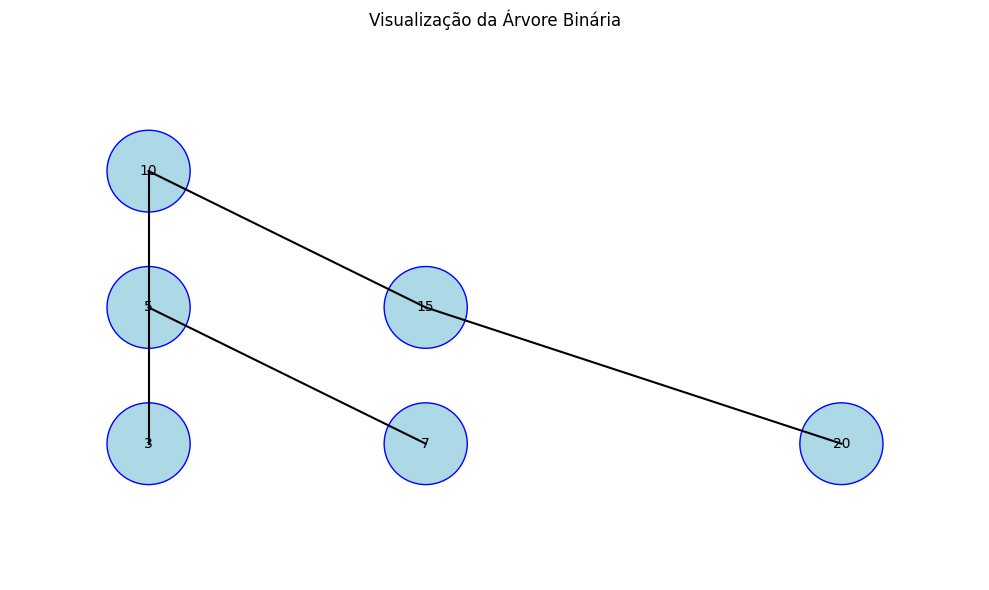

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def calcular_posicoes(no, nivel=0, offset=0, posicoes=None, largura_nivel=None):
    if posicoes is None:
        posicoes = {}
    if largura_nivel is None:
        largura_nivel = {}

    if no is None:
        return posicoes, largura_nivel

    # Inicializa a largura do nível se ainda não existir
    if nivel not in largura_nivel:
        largura_nivel[nivel] = 0

    # Calcula posições para a subárvore esquerda
    posicoes, largura_nivel = calcular_posicoes(no.esquerda, nivel + 1, offset, posicoes, largura_nivel)

    # Posiciona o nó atual
    x = offset + largura_nivel[nivel]
    y = nivel
    posicoes[no] = (x, y)
    largura_nivel[nivel] += 1

    # Calcula posições para a subárvore direita
    posicoes, largura_nivel = calcular_posicoes(no.direita, nivel + 1, offset + largura_nivel[nivel], posicoes, largura_nivel)

    return posicoes, largura_nivel

def visualizar_arvore(raiz):
    if raiz is None:
        print("Árvore vazia")
        return

    posicoes, _ = calcular_posicoes(raiz)

    # Configuração do plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_axis_off()

    # Desenha os nós e as arestas
    for no, (x, y) in posicoes.items():
        # Desenha o nó
        circle = patches.Circle((x, -y), 0.3, facecolor='lightblue', edgecolor='blue')
        ax.add_patch(circle)
        ax.text(x, -y, str(no.valor), ha='center', va='center')

        # Desenha as arestas para os filhos
        if no.esquerda and no.esquerda in posicoes:
            child_x, child_y = posicoes[no.esquerda]
            ax.plot([x, child_x], [-y, -child_y], 'k-')

        if no.direita and no.direita in posicoes:
            child_x, child_y = posicoes[no.direita]
            ax.plot([x, child_x], [-y, -child_y], 'k-')

    # Ajusta os limites do plot
    xs = [x for x, y in posicoes.values()]
    ys = [-y for x, y in posicoes.values()]
    ax.set_xlim(min(xs) - 1, max(xs) + 1)
    ax.set_ylim(min(ys) - 1, max(ys) + 1)

    plt.title("Visualização da Árvore Binária")
    plt.tight_layout()
    plt.show()

# Testando a visualização gráfica
visualizar_arvore(raiz)

## **Percursos em Árvores Binárias**



Existem três formas principais de percorrer uma árvore binária:

1. **Pré-ordem (Pre-order)**: Visita a raiz, depois a subárvore esquerda e por fim a subárvore direita.
2. **Em-ordem (In-order)**: Visita a subárvore esquerda, depois a raiz e por fim a subárvore direita.
3. **Pós-ordem (Post-order)**: Visita a subárvore esquerda, depois a subárvore direita e por fim a raiz.

Vamos implementar esses três tipos de percurso:

In [4]:
def pre_ordem(no):
    if no is None:
        return []

    resultado = [no.valor]  # Visita o nó atual
    resultado.extend(pre_ordem(no.esquerda))  # Visita a subárvore esquerda
    resultado.extend(pre_ordem(no.direita))  # Visita a subárvore direita

    return resultado

def em_ordem(no):
    if no is None:
        return []

    resultado = em_ordem(no.esquerda)  # Visita a subárvore esquerda
    resultado.append(no.valor)  # Visita o nó atual
    resultado.extend(em_ordem(no.direita))  # Visita a subárvore direita

    return resultado

def pos_ordem(no):
    if no is None:
        return []

    resultado = pos_ordem(no.esquerda)  # Visita a subárvore esquerda
    resultado.extend(pos_ordem(no.direita))  # Visita a subárvore direita
    resultado.append(no.valor)  # Visita o nó atual

    return resultado

# Testando os percursos
print(f"Percurso em pré-ordem: {pre_ordem(raiz)}")
print(f"Percurso em em-ordem: {em_ordem(raiz)}")
print(f"Percurso em pós-ordem: {pos_ordem(raiz)}")

Percurso em pré-ordem: [10, 5, 3, 7, 15, 20]
Percurso em em-ordem: [3, 5, 7, 10, 15, 20]
Percurso em pós-ordem: [3, 7, 5, 20, 15, 10]


### **Percurso em Largura (BFS - Breadth-First Search)**

Além dos percursos em profundidade (pré-ordem, em-ordem e pós-ordem), também podemos percorrer a árvore em largura, visitando todos os nós de um nível antes de passar para o próximo nível. Para isso, usamos uma fila:

In [5]:
from collections import deque

def percurso_em_largura(raiz):
    if raiz is None:
        return []

    resultado = []
    fila = deque([raiz])

    while fila:
        no = fila.popleft()  # Remove o primeiro nó da fila
        resultado.append(no.valor)  # Visita o nó

        # Adiciona os filhos à fila
        if no.esquerda:
            fila.append(no.esquerda)
        if no.direita:
            fila.append(no.direita)

    return resultado

# Testando o percurso em largura
print(f"Percurso em largura: {percurso_em_largura(raiz)}")

Percurso em largura: [10, 5, 15, 3, 7, 20]


## **Operações Básicas em Árvores Binárias**



Vamos implementar algumas operações básicas em árvores binárias:

In [6]:
def altura_arvore(no):
    """Calcula a altura da árvore."""
    if no is None:
        return -1  # Altura de uma árvore vazia é -1

    altura_esquerda = altura_arvore(no.esquerda)
    altura_direita = altura_arvore(no.direita)

    # A altura é o máximo entre as alturas das subárvores + 1
    return max(altura_esquerda, altura_direita) + 1

def contar_nos(no):
    """Conta o número total de nós na árvore."""
    if no is None:
        return 0

    return 1 + contar_nos(no.esquerda) + contar_nos(no.direita)

def contar_folhas(no):
    """Conta o número de nós folha na árvore."""
    if no is None:
        return 0

    # Se o nó não tem filhos, é uma folha
    if no.esquerda is None and no.direita is None:
        return 1

    return contar_folhas(no.esquerda) + contar_folhas(no.direita)

def buscar_valor(no, valor):
    """Verifica se um valor existe na árvore."""
    if no is None:
        return False

    if no.valor == valor:
        return True

    return buscar_valor(no.esquerda, valor) or buscar_valor(no.direita, valor)

# Testando as operações
print(f"Altura da árvore: {altura_arvore(raiz)}")
print(f"Número total de nós: {contar_nos(raiz)}")
print(f"Número de folhas: {contar_folhas(raiz)}")
print(f"O valor 7 existe na árvore? {buscar_valor(raiz, 7)}")
print(f"O valor 12 existe na árvore? {buscar_valor(raiz, 12)}")

Altura da árvore: 2
Número total de nós: 6
Número de folhas: 3
O valor 7 existe na árvore? True
O valor 12 existe na árvore? False


## **Árvore Binária de Busca (BST)**

É um tipo especial de árvore binária que mantém uma ordenação específica: para cada nó, todos os elementos na subárvore esquerda são menores que o nó, e todos os elementos na subárvore direita são maiores. Vamos implementar uma classe para representar uma BST e suas operações básicas:

Árvore Binária de Busca criada com os valores: [50, 30, 70, 20, 40, 60, 80]
Percurso em-ordem (deve estar ordenado): [20, 30, 40, 50, 60, 70, 80]
Valor mínimo: 20
Valor máximo: 80


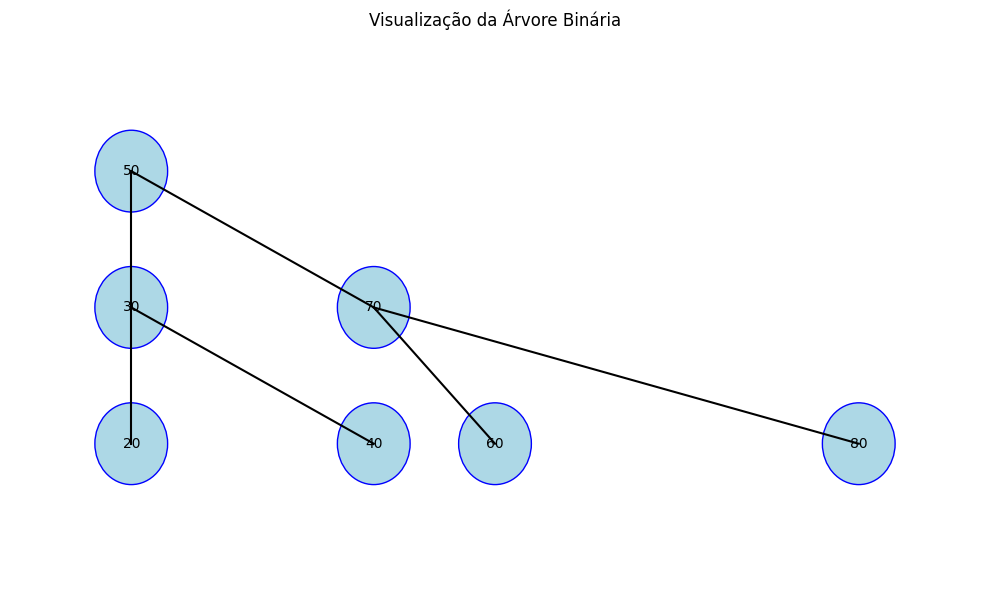

Busca pelo valor 40: Encontrado

Removendo o valor 30...
Percurso em-ordem após remoção: [20, 40, 50, 60, 70, 80]


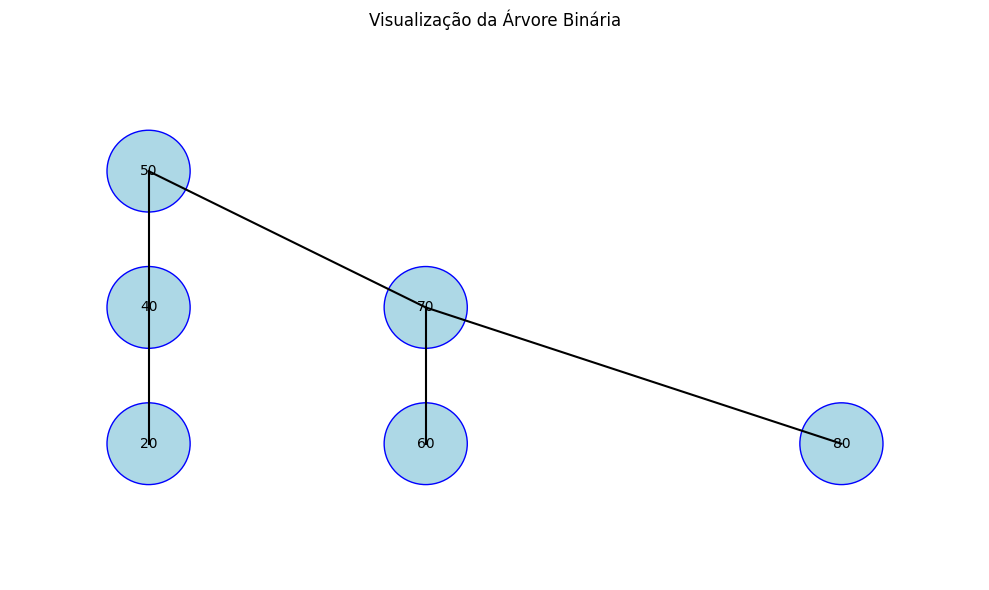

In [7]:
class ArvoreBinariaBusca:
    def __init__(self):
        self.raiz = None

    def inserir(self, valor):
        """Insere um valor na árvore."""
        if self.raiz is None:
            self.raiz = No(valor)
        else:
            self._inserir_recursivo(self.raiz, valor)

    def _inserir_recursivo(self, no, valor):
        """Função auxiliar para inserção recursiva."""
        if valor < no.valor:
            if no.esquerda is None:
                no.esquerda = No(valor)
            else:
                self._inserir_recursivo(no.esquerda, valor)
        else:  # valor >= no.valor
            if no.direita is None:
                no.direita = No(valor)
            else:
                self._inserir_recursivo(no.direita, valor)

    def buscar(self, valor):
        """Busca um valor na árvore."""
        return self._buscar_recursivo(self.raiz, valor)

    def _buscar_recursivo(self, no, valor):
        """Função auxiliar para busca recursiva."""
        if no is None or no.valor == valor:
            return no

        if valor < no.valor:
            return self._buscar_recursivo(no.esquerda, valor)
        else:
            return self._buscar_recursivo(no.direita, valor)

    def minimo(self):
        """Retorna o valor mínimo na árvore."""
        if self.raiz is None:
            return None

        atual = self.raiz
        while atual.esquerda is not None:
            atual = atual.esquerda

        return atual.valor

    def maximo(self):
        """Retorna o valor máximo na árvore."""
        if self.raiz is None:
            return None

        atual = self.raiz
        while atual.direita is not None:
            atual = atual.direita

        return atual.valor

    def remover(self, valor):
        """Remove um valor da árvore."""
        self.raiz = self._remover_recursivo(self.raiz, valor)

    def _remover_recursivo(self, no, valor):
        """Função auxiliar para remoção recursiva."""
        if no is None:
            return None

        # Busca o nó a ser removido
        if valor < no.valor:
            no.esquerda = self._remover_recursivo(no.esquerda, valor)
        elif valor > no.valor:
            no.direita = self._remover_recursivo(no.direita, valor)
        else:
            # Caso 1: Nó folha (sem filhos)
            if no.esquerda is None and no.direita is None:
                return None

            # Caso 2: Nó com apenas um filho
            elif no.esquerda is None:
                return no.direita
            elif no.direita is None:
                return no.esquerda

            # Caso 3: Nó com dois filhos
            # Encontra o sucessor in-order (menor valor na subárvore direita)
            sucessor = self._encontrar_minimo(no.direita)
            no.valor = sucessor.valor
            no.direita = self._remover_recursivo(no.direita, sucessor.valor)

        return no

    def _encontrar_minimo(self, no):
        """Encontra o nó com o valor mínimo na subárvore."""
        atual = no
        while atual.esquerda is not None:
            atual = atual.esquerda
        return atual

    def em_ordem(self):
        """Retorna os valores da árvore em ordem crescente."""
        return em_ordem(self.raiz)

    def visualizar(self):
        """Visualiza a árvore."""
        visualizar_arvore(self.raiz)

# Testando a Árvore Binária de Busca
bst = ArvoreBinariaBusca()
valores = [50, 30, 70, 20, 40, 60, 80]

for valor in valores:
    bst.inserir(valor)

print("Árvore Binária de Busca criada com os valores:", valores)
print(f"Percurso em-ordem (deve estar ordenado): {bst.em_ordem()}")
print(f"Valor mínimo: {bst.minimo()}")
print(f"Valor máximo: {bst.maximo()}")

# Visualizando a árvore
bst.visualizar()

# Testando a busca
valor_busca = 40
resultado = bst.buscar(valor_busca)
print(f"Busca pelo valor {valor_busca}: {'Encontrado' if resultado else 'Não encontrado'}")

# Testando a remoção
valor_remover = 30
print(f"\nRemovendo o valor {valor_remover}...")
bst.remover(valor_remover)
print(f"Percurso em-ordem após remoção: {bst.em_ordem()}")

# Visualizando a árvore após remoção
bst.visualizar()

## **Aplicações de Árvores Binárias**



Árvores binárias são estruturas de dados versáteis com muitas aplicações práticas:

1. **Árvores de Expressão**: Representação de expressões matemáticas para avaliação e compilação.
2. **Árvores de Huffman**: Usadas em algoritmos de compressão de dados.
3. **Árvores de Busca Binária**: Implementação eficiente de dicionários e conjuntos.
4. **Árvores Balanceadas**: AVL, Rubro-Negras, B-Trees para operações eficientes de busca, inserção e remoção.
5. **Árvores de Decisão**: Usadas em algoritmos de aprendizado de máquina.
6. **Heap Binário**: Implementação de filas de prioridade.

### **Avaliação de Expressões Matemáticas**

Vamos implementar uma árvore de expressão para avaliar expressões matemáticas simples:

In [8]:
class NoExpressao:
    def __init__(self, valor):
        self.valor = valor
        self.esquerda = None
        self.direita = None

def avaliar_expressao(no):
    """Avalia uma árvore de expressão."""
    if no is None:
        return 0

    # Se o nó é uma folha (operando), retorna seu valor
    if no.esquerda is None and no.direita is None:
        return float(no.valor)

    # Avalia as subárvores esquerda e direita
    valor_esquerda = avaliar_expressao(no.esquerda)
    valor_direita = avaliar_expressao(no.direita)

    # Aplica a operação correspondente
    if no.valor == '+':
        return valor_esquerda + valor_direita
    elif no.valor == '-':
        return valor_esquerda - valor_direita
    elif no.valor == '*':
        return valor_esquerda * valor_direita
    elif no.valor == '/':
        return valor_esquerda / valor_direita

    return 0

# Criando uma árvore de expressão para (3 + 4) * 5
#      *
#     / \
#    +   5
#   / \
#  3   4

raiz_expr = NoExpressao('*')
raiz_expr.esquerda = NoExpressao('+')
raiz_expr.direita = NoExpressao('5')
raiz_expr.esquerda.esquerda = NoExpressao('3')
raiz_expr.esquerda.direita = NoExpressao('4')

# Avaliando a expressão
resultado = avaliar_expressao(raiz_expr)
print(f"Resultado da expressão (3 + 4) * 5 = {resultado}")

Resultado da expressão (3 + 4) * 5 = 35.0


## **Exercícios Práticos**

### **Exercício 1:** Verificar se uma árvore binária é uma árvore binária de busca (BST)

In [ ]:
def eh_bst(no, minimo=float('-inf'), maximo=float('inf')):
    """Verifica se uma árvore binária é uma árvore binária de busca."""
    if no is None:
        return True

    # Verifica se o valor do nó está dentro dos limites permitidos
    if no.valor <= minimo or no.valor >= maximo:
        return False

    # Verifica recursivamente as subárvores
    return (eh_bst(no.esquerda, minimo, no.valor) and
            eh_bst(no.direita, no.valor, maximo))

# Testando com uma BST válida
print(f"A árvore BST criada anteriormente é uma BST válida? {eh_bst(bst.raiz)}")

# Criando uma árvore que não é BST
nao_bst = No(10)
nao_bst.esquerda = No(5)
nao_bst.direita = No(15)
nao_bst.esquerda.direita = No(20)  # Viola a propriedade BST (20 > 10)

print(f"A árvore não-BST é uma BST válida? {eh_bst(nao_bst)}")

### **Exercício 2:** Encontrar o Menor Ancestral Comum (LCA) de dois nós

In [ ]:
def encontrar_lca(raiz, n1, n2):
    """Encontra o menor ancestral comum de dois valores na árvore."""
    if raiz is None:
        return None

    # Se a raiz é um dos valores, ela é o LCA
    if raiz.valor == n1 or raiz.valor == n2:
        return raiz

    # Procura nas subárvores
    lca_esquerda = encontrar_lca(raiz.esquerda, n1, n2)
    lca_direita = encontrar_lca(raiz.direita, n1, n2)

    # Se ambos os valores foram encontrados em subárvores diferentes, a raiz é o LCA
    if lca_esquerda and lca_direita:
        return raiz

    # Caso contrário, retorna o LCA encontrado em uma das subárvores
    return lca_esquerda if lca_esquerda else lca_direita

# Testando com a BST criada anteriormente
lca = encontrar_lca(bst.raiz, 20, 40)
if lca:
    print(f"O menor ancestral comum de 20 e 40 é: {lca.valor}")
else:
    print("Um ou ambos os valores não foram encontrados na árvore.")

### **Exercício 3:** Verificar se duas árvores binárias são idênticas

In [ ]:
def sao_identicas(raiz1, raiz2):
    """Verifica se duas árvores binárias são idênticas."""
    # Se ambas são nulas, são idênticas
    if raiz1 is None and raiz2 is None:
        return True

    # Se uma é nula e a outra não, não são idênticas
    if raiz1 is None or raiz2 is None:
        return False

    # Verifica se os valores são iguais e se as subárvores são idênticas
    return (raiz1.valor == raiz2.valor and
            sao_identicas(raiz1.esquerda, raiz2.esquerda) and
            sao_identicas(raiz1.direita, raiz2.direita))

# Criando duas árvores para teste
arvore1 = No(1)
arvore1.esquerda = No(2)
arvore1.direita = No(3)

arvore2 = No(1)
arvore2.esquerda = No(2)
arvore2.direita = No(3)

arvore3 = No(1)
arvore3.esquerda = No(3)  # Valor diferente
arvore3.direita = No(3)

print(f"Árvore 1 e Árvore 2 são idênticas? {sao_identicas(arvore1, arvore2)}")
print(f"Árvore 1 e Árvore 3 são idênticas? {sao_identicas(arvore1, arvore3)}")

## **Conclusão**



Neste notebook, exploramos os conceitos fundamentais de árvores binárias, incluindo:

- Definição e terminologia de árvores binárias
- Representação de árvores binárias em Python
- Percursos em árvores binárias (pré-ordem, em-ordem, pós-ordem e em largura)
- Operações básicas em árvores binárias
- Árvores Binárias de Busca (BST) e suas operações
- Aplicações práticas de árvores binárias
- Exercícios para praticar os conceitos

As árvores binárias são estruturas de dados fundamentais em ciência da computação, com aplicações em diversas áreas como algoritmos de busca, compiladores, compressão de dados e aprendizado de máquina. Dominar os conceitos e operações em árvores binárias é essencial para qualquer programador ou cientista da computação.



### **Próximos Passos**

Para aprofundar seus conhecimentos em árvores binárias, considere estudar:

1. Árvores balanceadas (AVL, Rubro-Negras)
2. Árvores B e B+
3. Heaps e filas de prioridade
4. Tries e árvores de sufixo
5. Algoritmos de travessia mais avançados
6. Aplicações em problemas reais